In [144]:
import os
import sys
import PIL
import PIL.Image as Image
from tqdm.notebook import tqdm
import numpy as np

In [145]:
#Need  to have pytorch for image grid
#!conda install pytorch torchvision cpuonly -c pytorch --yes
import torch
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image

## Resize, crop, and create folder

In [230]:
def load_image(filename):
    return Image.open(filename).convert('RGB') #this conversion is crucial as PIL will open png files with either 3 or 4 channels depending on encoding

def center_crop(img):
    '''Algorithm derived from nvidia preprocessor'''
    crop = np.min(img.shape[:2])
    img = img[(img.shape[0]-crop)//2:(img.shape[0]+crop)//2,(img.shape[1]-crop)//2:(img.shape[1]+crop)//2]
    img = Image.fromarray(img,'RGB')
    return img

def resize_and_crop(fp,width,height):
    img=np.asarray(load_image(fp),dtype=np.uint8)
    img=center_crop(img)
    
#     if img.size[1]<height or img.size[0]<width:
#         print('here')
#         print(fp)
    
    img=img.resize((width,height),Image.LANCZOS)
    img=np.array(img)
    
    canvas = np.zeros([width,width,3],dtype=np.uint8)
    canvas[(width-height)//2: (width+height)//2,:]=img
    return canvas 
def save_image(filename,subfolder,img):
    if not os.path.exists(os.path.join('Cropped Images',subfolder)):
        os.mkdir(os.path.join('Cropped Images',subfolder))
    if not os.path.exists(f'{os.path.join("Cropped Images",subfolder,filename)}.jpg'):
        img.save(f'{os.path.join("Cropped Images",subfolder,filename)}.jpg')

def get_files_with_image_endings(fp):
    img_endings = ['.png','.jpg','.jpeg']
    files = [i for i in os.listdir(fp) if any([i.endswith(ending) for ending in img_endings])]
    return files

def crop_folder(folder,width = 256, height = 256):
    base_fp= os.path.join('Images',folder)

    if not os.path.exists('Cropped Images'):
        os.mkdir('Cropped Images')
    files = get_files_with_image_endings(base_fp)#[i for i in os.listdir(base_fp) if any([i.endswith(ending) for ending in img_endings])]
    post_fix = {'Success':0,'Failed':0}
    pbar = tqdm(files)
    for file in pbar:
        fp = os.path.join(base_fp,file)
        try: #catches incorrectly sized or downloaded images
            img=Image.fromarray(resize_and_crop(fp,width,height),'RGB')
            filename = fp.split('/')[-1].split('.')[0]
            save_image(filename,folder,img)
            post_fix['Success']+=1  
        except ValueError:
            post_fix['Failed']+=1 
        except UnidentifiedImageError:
            post_fix['Failed']+=1 
        
        pbar.set_postfix(post_fix)
    pbar.close()


In [221]:
folder ='Idiotswithguns'
crop_folder(folder)

  0%|          | 0/1541 [00:00<?, ?it/s]

In [229]:
folder ='ChicksWithGuns'
crop_folder(folder)

  0%|          | 0/2972 [00:00<?, ?it/s]

In [231]:
folder ='TheWayWeWere'
crop_folder(folder)

  0%|          | 0/13802 [00:00<?, ?it/s]

/Users/mashyman/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (120384000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/mashyman/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (95344641 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/mashyman/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (139323036 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/mashyman/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (98683655 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/mashyman/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Ima

In [134]:
folder ='portraits'
crop_folder(folder)

  0%|          | 0/9466 [00:00<?, ?it/s]

/Users/mashyman/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (97135922 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/mashyman/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (110674971 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/mashyman/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (97141275 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


here
Images/portraits/1zbnb0r5gid31.jpg


UnidentifiedImageError: cannot identify image file 'Images/portraits/portrait1.jpg'

From manual inspection quite a few images in idiotswithguns do not contain a person holding a gun. This will be resolved using CLIP to remove photos that are not deemed likely to have a human.

In [225]:
def load_image_numpy(filename):
    return np.asarray(load_image(filename))


def show_folder_grid(fp,nrows=8,seed=21):
    np.random.seed(seed)
    files=get_files_with_image_endings(fp)
    files=np.random.choice(files,nrows**2)

    imgs = torch.from_numpy(np.array([load_image_numpy(os.path.join(fp,file)) for file in files]))
    imgs = imgs.permute((0,3,1,2)) #reorder from bhwc to bchw
    return to_pil_image(make_grid(imgs,nrow=nrows)),files

    

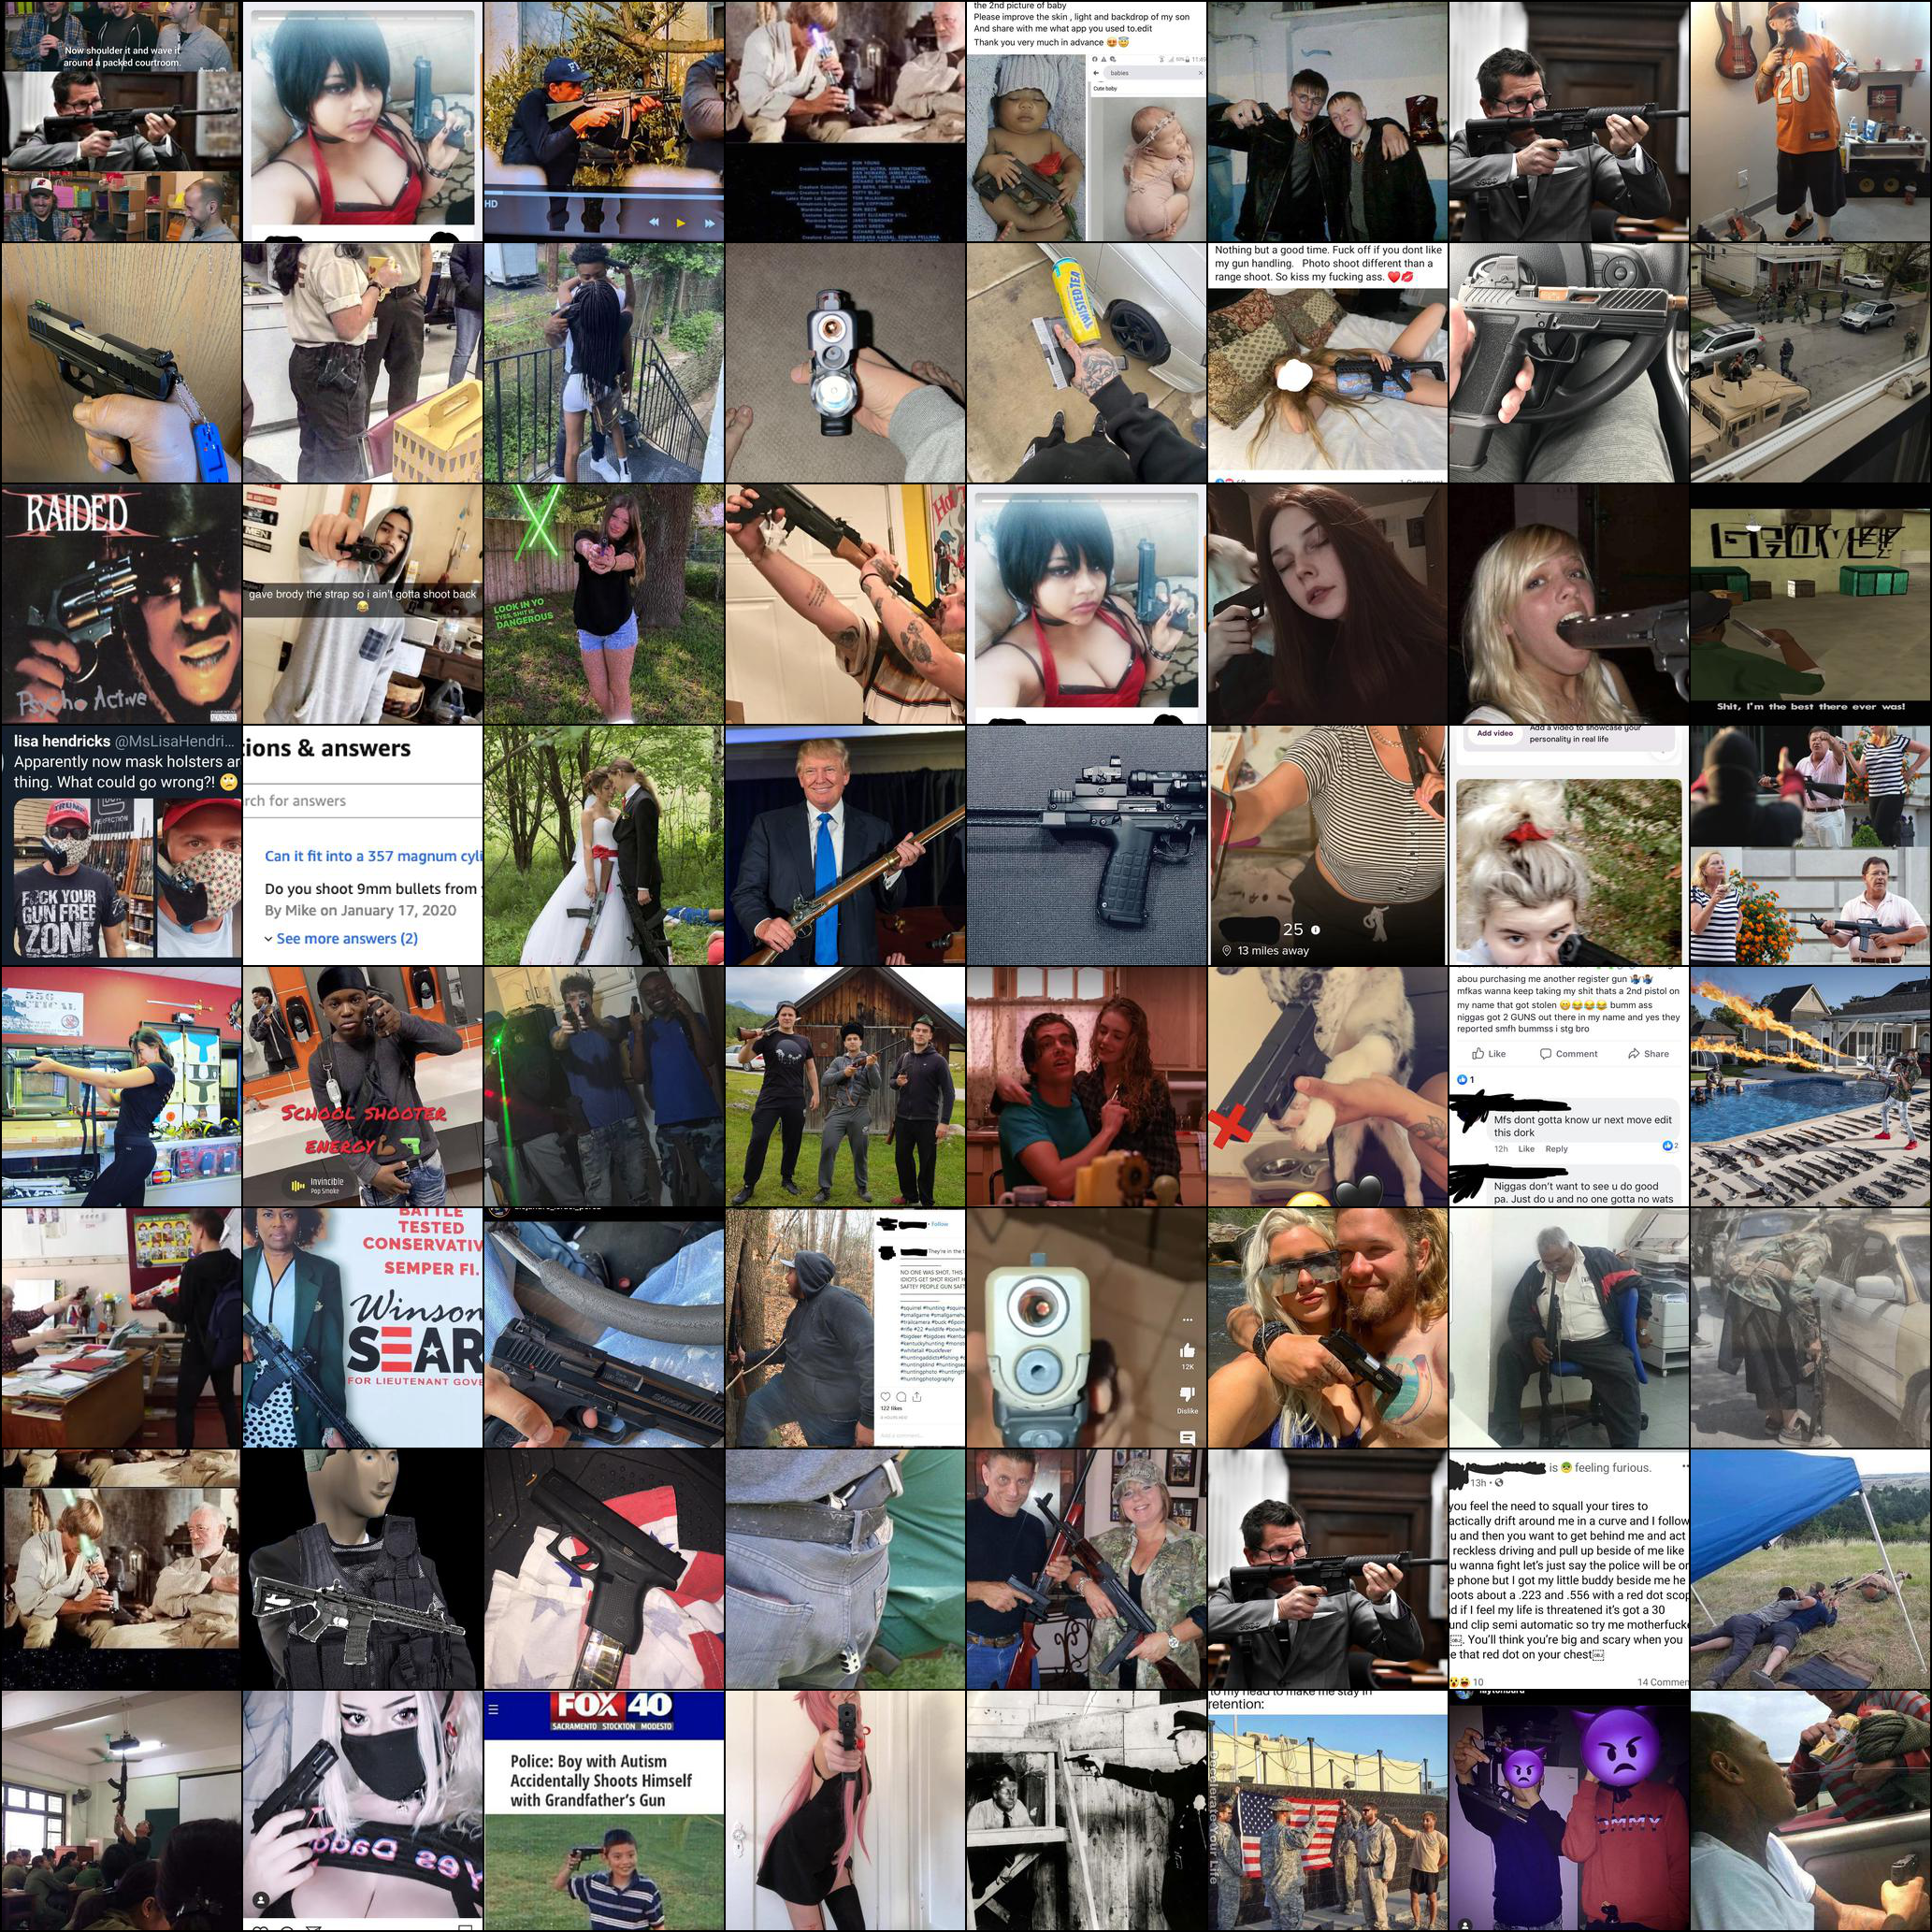

In [228]:
grid, files = show_folder_grid('Cropped Images/Idiotswithguns',seed=11)
grid

In [190]:
files[4]

'jlnbin1e0jx61.jpg'

In [210]:
load_image('Images/Idiotswithguns/pgvwccN.png')#.size

AttributeError: shape

In [184]:
load_image('Images/Idiotswithguns/jlnbin1e0jx61.png').size

(720, 602)

In [180]:
check = 'zmenb3e7dco31.png'
print(load_image(f'Images/Idiotswithguns/{check}').size)

#load_image(f'Cropped Images/Idiotswithguns/{check}')
# check = '5rbhzmly8ye71.png'
# print(load_image(f'Images/Idiotswithguns/{check}').size)

# check='6glg2dpyep771.jpg'
# here
# Images/Idiotswithguns/d8gyfvh4rgy51.jpg
# here
# Images/Idiotswithguns/4fgvjys9q0721.jpg
# here
# Images/Idiotswithguns/34rcwelm32k61.png
# here
# Images/Idiotswithguns/2J8XzVc.png
# here
# Images/Idiotswithguns/v1v2ybgtx6r51.jpg
# here
# Images/Idiotswithguns/2oupdx90hy241.png
# here
# Images/Idiotswithguns/hb4ot7k7c9u51.jpg
# here
# Images/Idiotswithguns/2s3q3y4r4a671.jpg
# here
# Images/Idiotswithguns/qhymu6otd0w41.png
# here
# Images/Idiotswithguns/t6az0KU.jpg
# here
# Images/Idiotswithguns/QJqMF7t.jpg

(700, 479)


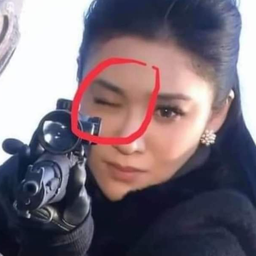

In [217]:
def load_image(filename):
    return Image.open(filename).convert('RGB')

def center_crop(img):
    '''Algorithm derived from nvidia preprocessor'''
    crop = np.min(img.shape[:2])
    img = img[(img.shape[0]-crop)//2:(img.shape[0]+crop)//2,(img.shape[1]-crop)//2:(img.shape[1]+crop)//2]
    img = Image.fromarray(img,'RGB')
    return img

def resize_and_crop(fp,width,height):
    img=np.asarray(load_image(fp),dtype=np.uint8)
    img=center_crop(img)
    
#     if img.size[1]<height or img.size[0]<width:
#         print('here')
#         print(fp)
    img=img.resize((width,height),Image.LANCZOS)
    img=np.array(img)

    canvas = np.zeros([width,width,3],dtype=np.uint8)
    canvas[(width-height)//2: (width+height)//2,:]=img
    return canvas 
def save_image(filename,subfolder,img):
    if not os.path.exists(os.path.join('Cropped Images',subfolder)):
        os.mkdir(os.path.join('Cropped Images',subfolder))
    img.save(f'{os.path.join("Cropped Images",subfolder,filename)}.jpg')

def get_files_with_image_endings(fp):
    img_endings = ['.png']#'.jpg','.jpeg']#,'.png']
    files = [i for i in os.listdir(fp) if any([i.endswith(ending) for ending in img_endings])]
    return files

def crop_folder(folder,width = 256, height = 256):
    base_fp= os.path.join('Images',folder)

    if not os.path.exists('Cropped Images'):
        os.mkdir('Cropped Images')
    files = get_files_with_image_endings(base_fp)#[i for i in os.listdir(base_fp) if any([i.endswith(ending) for ending in img_endings])]
    post_fix = {'Success':0,'Failed':0}
    pbar = tqdm(files)
    for file in pbar:
        fp = os.path.join(base_fp,file)
        try: #catches incorrectly sized or downloaded images
            img=Image.fromarray(resize_and_crop(fp,width,height),'RGB')
            filename = fp.split('/')[-1].split('.')[0]
            save_image(filename,folder,img)
            post_fix['Success']+=1  
        except ValueError:
            post_fix['Failed']+=1  
        pbar.set_postfix(post_fix)
    pbar.close()

    
fp ='Images/Idiotswithguns/jlnbin1e0jx61.png'
bfp = 'Images/Idiotswithguns/pgvwccN.png'
#fp=bfp
#np.min(np.asarray(load_image(fp)).shape)
#img=np.asarray(load_image(fp))
#crop = np.min(np.asarray(load_image(fp)).shape[:2])


#img = img[(img.shape[0]-crop)//2:(img.shape[0]+crop)//2,(img.shape[1]-crop)//2:(img.shape[1]+crop)//2]



#resize_and_crop(fp,256,256)